# **CS412 - Machine Learning - Fall 2023**
## **Homework 1**
100 pts


## **Goal**

*   Introduction to the machine learning experimental setup
*   Gain experience with the decision tree algortihm
*   Gain experience with the scikit-learn library
*   Learn to use appropriate prompts with AI tools



## **Dataset**
This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended/data) and modified for Homework 1.


Columns:


**Species:** Species of the penguin (Adelie, Chinstrap, Gentoo)

**Island:** Island where the penguin was found (Biscoe, Dream, Torgensen)

**Sex:** Gender of the penguin (Male, Female)

**Diet:** Primary diet of the penguin (Fish, Krill, Squid)

**Year:** Year the data was collected (2021-2025)

**Life Stage:** The life stage of the penguin (Chick, Juvenile, Adult)

**Body Mass (g):** Body mass in grams

**Bill Length (mm):** Bill length in millimeters

**Bill Depth (mm):** Bill depth in millimeters

**Flipper Length (mm):** Flipper length in millimeters

**Health Metrics:** Health status of the penguin (Healthy, Overweight, Underweight)




❗ **Download the data from SuCourse.** It's named **cs412_hw1_dataset.csv**.
You must use 20% of the data for test and 80% for training:


 **Training: 80%,  Test: 20%**

## **Task**
Build a decision tree classifier with the scikit library function to predict Penguin health conditions - given in **Target column** health_metrics .

You will use ChatGPT **3.5** to write your code. For each part, send a prompt to ChatGPT for the task. You can use the initial prompt OR use additional prompts to correct / guide GPT. Copy the code generated by GPT to this notebook and run it here.

❗ **You will share your chat history, so use the same chat for ALL your prompts.**

## **Software: You may find the necessary function references here:**
http://scikit-learn.org/stable/supervised_learning.html

## **Submission:**
Once you have completed this notebook, Download it as .ipynb and name it Name-Surname-CS412-HW1.ipynb. (You can download by clicking on File - Download - Download .ipynb). Submit the ipynb to SuCourse.



## 0) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   You may upload the data to the section on your left on Colab, than right click on the .csv file and get the path of the file by clicking on "Copy Path". You will be using it when loading the data.


## 1) Import necessary libraries

In [1]:
# code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


## 2) Load training dataset (5 pts)

*  Read the .csv file with the pandas library



In [2]:
# code here

file_path = 'cs412_hw1_dataset.csv'
df = pd.read_csv(file_path)

## 3) Understanding the dataset & Preprocessing (15 pts)

Understanding the Dataset: (5 pts)


> - Find the shape of the dataset (number of samples & number of attributes). (Hint: You can use the **shape** function)

> - Display variable names (both dependent and independent).


> - Display the summary of the dataset. (Hint: You can use the **info** function)


> - Display the first 5 rows from training dataset. (Hint: You can use the **head** function)




Preprocessing: (10 pts)


> - Check if there are any missing values in the dataset. If there are, you can either drop these values or fill it with most common values in corresponding rows. **Be careful that you have enough data for training the  model.**


> - Encode categorical labels with the mappings given in the cell below. (Hint: You can use **map** function)


In [3]:
# code here

num_samples, num_attributes = df.shape
print(f"Number of samples: {num_samples}")
print(f"Number of attributes: {num_attributes}")

variable_names = df.columns.tolist()
print("Variable names:")
print(variable_names)

df.info()

first_5_rows = df.head()
print("First 5 rows of the dataset:")
print(first_5_rows)

placeholders = ['', 'NA', 'null', -1]  # Add or remove placeholders as needed
for placeholder in placeholders:
    df.replace(placeholder, np.nan, inplace=True)


# Check for missing values
print("")
missing_values = df.isna().sum()
print("Missing values per column (na):")
print(missing_values)


# Option 1: Drop rows with any missing values
# df_cleaned = df.dropna()

# Option 2: Fill missing values with the most common value in each column
for column in df.columns:
    most_common = df[column].value_counts().idxmax()
    df[column].fillna(most_common, inplace=True)

# Print the dataset after handling missing values
# print("Dataset after handling missing values:")
# print(df_cleaned.head())  

print(df.head()) # based on the option chosen


#most_common_values = df.mode().iloc[0]  # Get the most common values in each column
#df = df.fillna(most_common_values)

Number of samples: 3430
Number of attributes: 11
Variable names:
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'diet', 'life_stage', 'health_metrics', 'year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3182 non-null   object 
 1   island             3388 non-null   object 
 2   bill_length_mm     3240 non-null   float64
 3   bill_depth_mm      3167 non-null   float64
 4   flipper_length_mm  3219 non-null   float64
 5   body_mass_g        3200 non-null   float64
 6   sex                3179 non-null   object 
 7   diet               3163 non-null   object 
 8   life_stage         3361 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3387 non-null   float64
dtypes: float64(5), object(6)
memory usage: 294.9+ KB
Fi

In [4]:
sex_map = {'female':1, 'male': 0}

island_map = {'Biscoe': 1,
              'Dream': 2,
              'Torgensen': 3}

diet_map = {'fish': 1,
              'krill': 2,
              'squid': 3,
            "parental":4}

life_stage_map = {'chick': 1,
              'juvenile': 2,
              'adult': 3}

health_metrics_map = {'healthy': 1,
              'overweight': 2,
              'underweight': 3}

# code here

#species_map = {'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}  # Modify as per your data
#df['species'] = df['species'].map(species_map)


# Apply the mappings to the respective columns
df['sex'] = df['sex'].map(sex_map)
df['island'] = df['island'].map(island_map)
df['diet'] = df['diet'].map(diet_map)
df['life_stage'] = df['life_stage'].map(life_stage_map)
df['health_metrics'] = df['health_metrics'].map(health_metrics_map)

## 4) Set X & y, split data (5 pts)

*   Shuffle the dataset.
*   Seperate your dependent variable X, and your independent variable y. The column health_metrics is y, the rest is X.
*   Split training and test sets as 80% and 20%, respectively.





In [5]:
# Shuffle the dataset
df = shuffle(df, random_state=42)

# Separate X (independent variables) and y (dependent variable)
X = df.drop(columns=['health_metrics', 'species'])  # Drop the 'health_metrics' column to get X
y = df['health_metrics']  # 'health_metrics' column is y

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2744, 9)
Shape of X_test: (686, 9)
Shape of y_train: (2744,)
Shape of y_test: (686,)


## 4.1) Features and Correlations (10 pts)

* Correlations of features with health (4 points)
Calculate the correlations for all features in dataset. Highlight any strong correlations with the target variable. Plot your results in a heatmap.

* Feature Selection (3 points)
Select a subset of features that are likely strong predictors, justifying your choices based on the computed correlations.

* Hypothetical Driver Features (3 points)
Propose two hypothetical features that could enhance the model's predictive accuracy for Y, explaining how they might be derived and their expected impact. Show the resulting correlations with target variable.

* __Note:__ You get can get help from GPT.


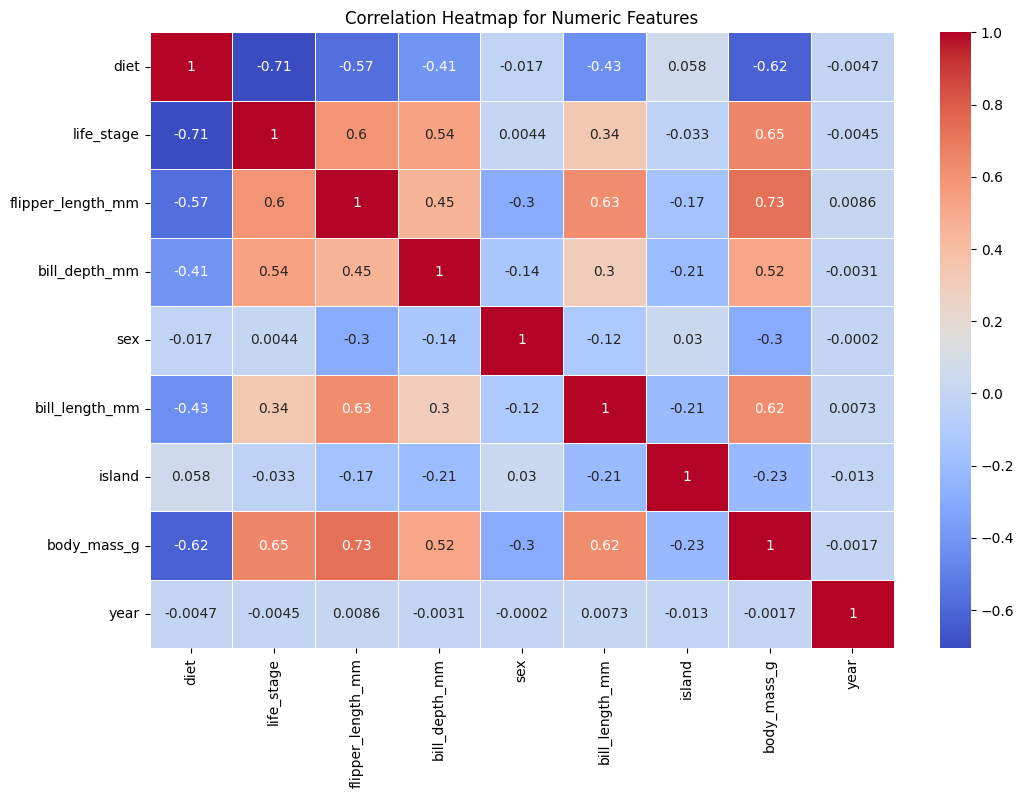

In [6]:
# code here

numeric_features = df.select_dtypes(include=[np.number])

# Calculate correlations between all numeric features and the target variable
correlations_numeric = numeric_features.corr()['health_metrics'].abs().sort_values(ascending=False)

# Filter out the target variable itself (correlation with itself is 1.0)
correlations_numeric = correlations_numeric.drop('health_metrics')

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features[correlations_numeric.index].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Features')
plt.show()


In [7]:
# Set a correlation threshold for numeric features
correlation_threshold_numeric = 0.1

# Select numeric features with correlations above the threshold
selected_numeric_features = correlations_numeric[correlations_numeric > correlation_threshold_numeric].index.tolist()

# The selected_numeric_features list now contains the names of strong predictor numeric features
print("Selected Numeric Features:", selected_numeric_features)


# ChatGPT gave some idea here but did not do what I would prefer so I did my own way.
for feature in selected_numeric_features:
    correlation = numeric_features[feature].corr(numeric_features['health_metrics'])
    formatted_correlation = "{:.4f}".format(correlation)
    print(f"Correlation with '{feature}': {formatted_correlation}")


Selected Numeric Features: ['diet', 'life_stage']
Correlation with 'diet': -0.1726
Correlation with 'life_stage': 0.1296


**You can write your answers to (4.1) here.**
----
Physical Activity Index (PAI): A feature derived from activity data, combining metrics like step count, exercise minutes, and heart rate. A higher PAI might indicate better health, and you can calculate it based on data from fitness trackers.

Stress Level: A feature representing stress levels, which can be measured through surveys or wearable devices that track stress-related parameters like heart rate variability. Higher stress levels may correlate with poorer health.

## 5) Tune Hyperparameters (20 pts)


* Choose 2 hyperparameters to tune. You can use the [Scikit learn decision tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 5. Use validation accuracy to pick the best hyper-parameter values. (15 pts)
-Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)* (5 pts)



In [8]:
dtree = DecisionTreeClassifier()

# Define the grid of parameters to search
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 10, 20, 40, 60]
}


# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Store the best parameters in variables
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']

# Now you can use these variables to create your Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split)

Best parameters: {'max_depth': 10, 'min_samples_split': 2}
Best cross-validation accuracy: 0.7602083416430669


**Add explanation here:**

## 6) Re-train and plot the decision tree with the hyperparameters you have chosen (15 pts)

- Re-train model with the hyperparameters you have chosen in part 5). (10 pts)
- Plot the tree you have trained. (5 pts)

Hint: You can import the **plot_tree** function from the sklearn library.





In [9]:
# code here

# Re-train the Decision Tree model with the best hyperparameters
dtree_optimized = DecisionTreeClassifier(max_depth=best_max_depth, 
                                        min_samples_split=best_min_samples_split, random_state=42)
dtree_optimized.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=10, random_state=42)

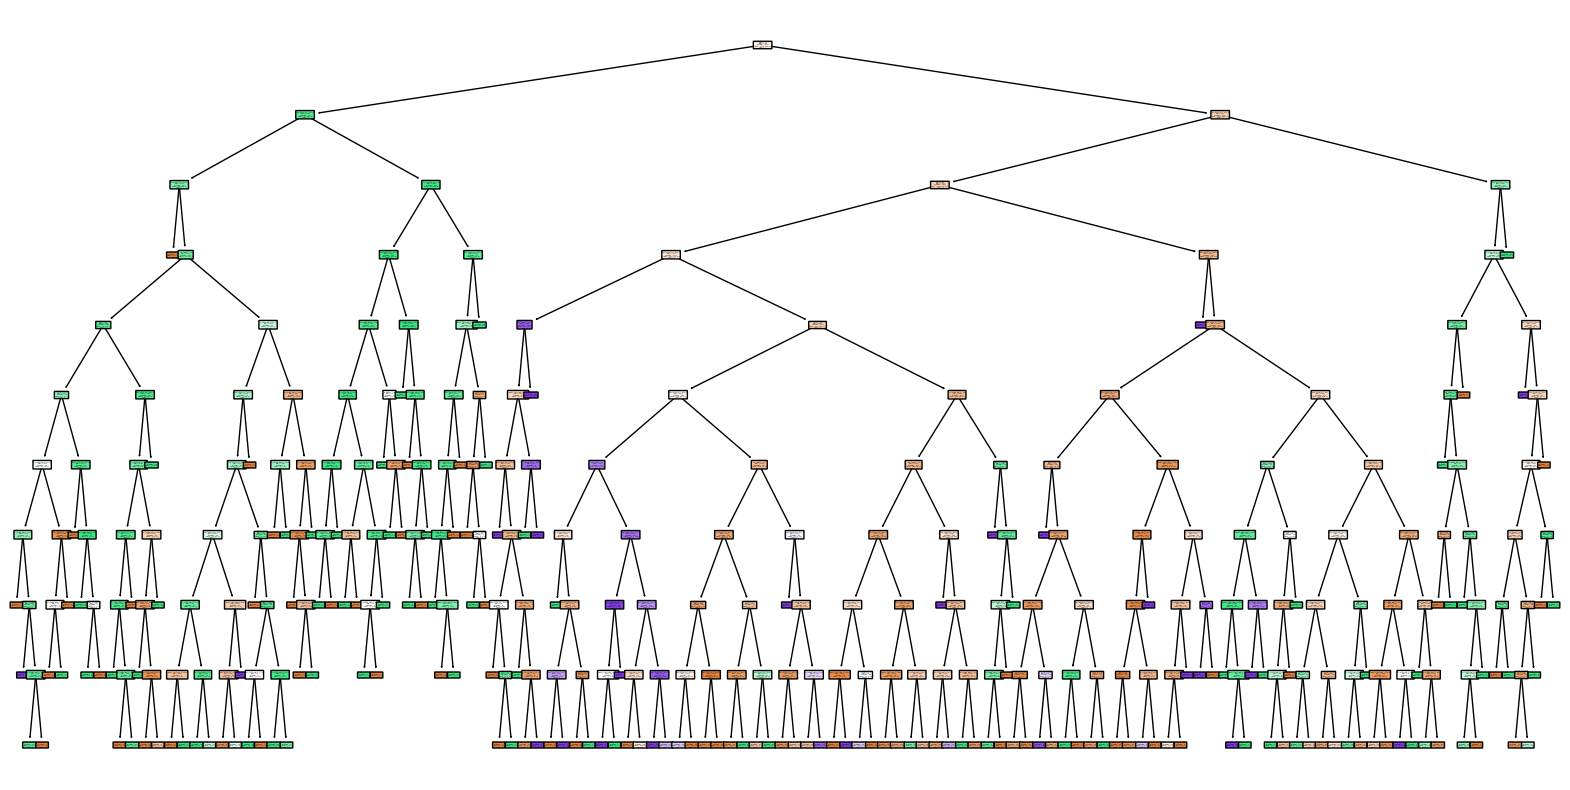

In [10]:
from sklearn.tree import plot_tree

#code here

# Convert class names to strings
class_names_str = [str(cls) for cls in dtree_optimized.classes_]

# Plot the optimized tree
plt.figure(figsize=(20,10))
plot_tree(dtree_optimized, filled=True, feature_names=X.columns, class_names=class_names_str, rounded=True)
plt.show()



## 7) Test your classifier on the test set (20 pts)

- Predict the labels of testing data using the tree you have trained in step 6. (10 pts)
- Report the classification accuracy. (2 pts)
- Plot & investigate the confusion matrix. Fill the following blanks. (8 pts)
> The model most frequently mistakes class(es) _________ for class(es) _________.

Hint: You can use the confusion_matrix function from sklearn.metrics



In [11]:
# code here

# Predict the labels of the testing data
y_pred = dtree_optimized.predict(X_test)

# Report the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

Classification accuracy: 0.7886297376093294


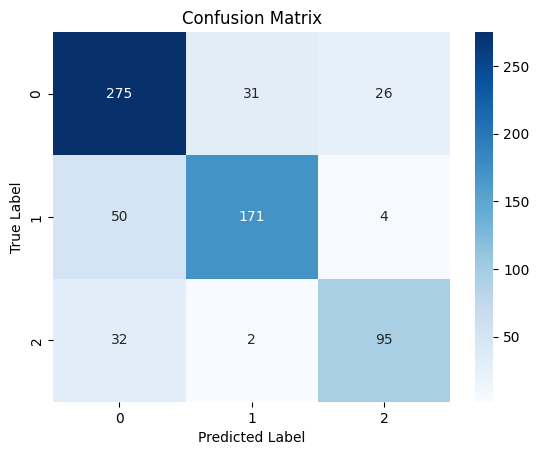

The model misclassifies class 0 as class 1 in 31 instances.
The model misclassifies class 0 as class 2 in 26 instances.
The model misclassifies class 1 as class 0 in 50 instances.
The model misclassifies class 1 as class 2 in 4 instances.
The model misclassifies class 2 as class 0 in 32 instances.
The model misclassifies class 2 as class 1 in 2 instances.


In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#code here

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Investigate the confusion matrix
# Find the most common misclassifications
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        if i != j and conf_matrix[i][j] > 0:  # Check for misclassifications
            print(f"The model misclassifies class {i} as class {j} in {conf_matrix[i][j]} instances.")


**Fill the blanks:** The model most frequently mistakes class ___1___ for class ___0___.

## 8) Find the information gain on the first split (10 pts)

- Find the information gain on the first split with **Entropy** according to the formula from the lecture notes (given below)
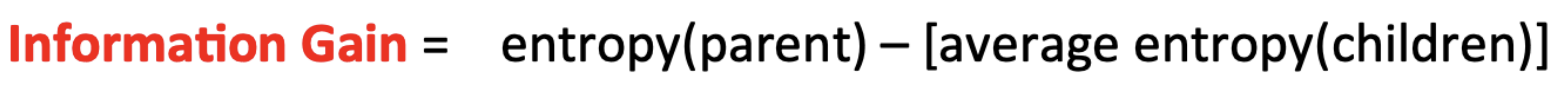



In [13]:
"""
# Version 2

from scipy.stats import entropy

# Convert y_train to a NumPy array if it's not already
y_train_np = np.array(y_train)

# Assuming the left and right child labels are derived as before
left_child_labels = y_train_np[left_indices]
right_child_labels = y_train_np[right_indices]

# Calculate the entropy of the parent node
parent_entropy = entropy(np.bincount(y_train_np), base=2)

# Calculate the entropy of each child node
left_child_entropy = entropy(np.bincount(left_child_labels), base=2)
right_child_entropy = entropy(np.bincount(right_child_labels), base=2)

# Calculate the weighted average entropy of the children
total_samples = len(y_train_np)
average_child_entropy = ((len(left_child_labels) / total_samples) * left_child_entropy +
                         (len(right_child_labels) / total_samples) * right_child_entropy)

# Calculate the information gain
information_gain = parent_entropy - average_child_entropy

print("Information Gain:", information_gain)

"""

splitting_feature = dtree_optimized.tree_.feature[0]
threshold = dtree_optimized.tree_.threshold[0]

# Get the column name for the splitting feature
splitting_feature_name = X_train.columns[splitting_feature]

# Use the column name to perform the split
left_indices = X_train[splitting_feature_name] <= threshold
right_indices = X_train[splitting_feature_name] > threshold

# Convert y_train to a NumPy array if it's not already
y_train_np = np.array(y_train)

left_labels = y_train_np[left_indices]
right_labels = y_train_np[right_indices]

# Functions for entropy and information gain
def entropy(labels):
    # Calculate the entropy of a label distribution.
    label_counts = np.bincount(labels)
    probabilities = label_counts / np.sum(label_counts)
    nonzero_probs = probabilities[probabilities > 0]
    return -np.sum(nonzero_probs * np.log2(nonzero_probs))

def information_gain(parent_labels, child_labels_list):
    # Calculate the information gain, given parent and children labels.
    # Entropy of the parent node
    entropy_parent = entropy(parent_labels)

    # Weighted sum of the entropy of child nodes
    total_samples = len(parent_labels)
    weighted_entropy_children = sum(entropy(child_labels) * len(child_labels) / total_samples for child_labels in child_labels_list)

    # Information gain
    return entropy_parent - weighted_entropy_children

# Information Gain calculation
info_gain = information_gain(y_train_np, [left_labels, right_labels])
print("Information Gain:", info_gain)


Information Gain: 0.30713846846159853



## 9) GPT 3.5 Chat History

Submit the link for your chat history.



*   When you are in the chat, click on the "Share Chat" button on the top right (Shown Below).

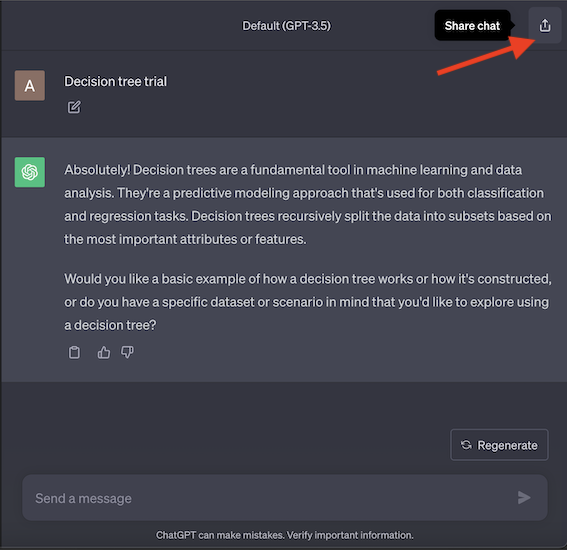

- On the screen that opens up, name the chat Name-Surname-CS412-HW1 (Shown Below).

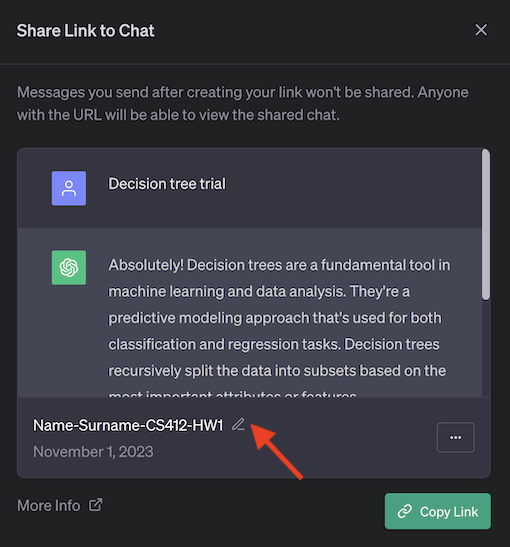

- Set sharing to "Share your name" (Shown Below).

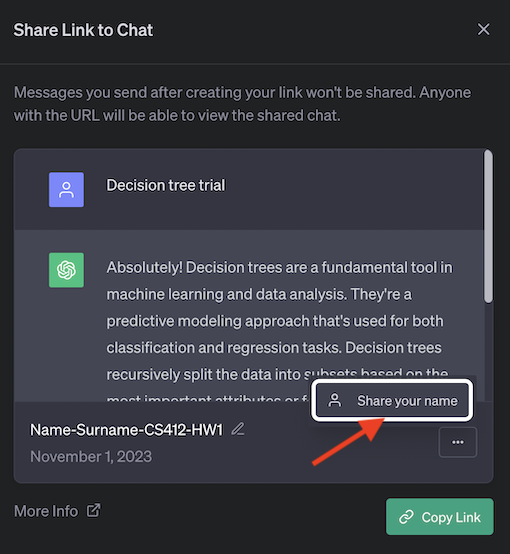

- Copy link and paste to the text cell below (Shown Below).

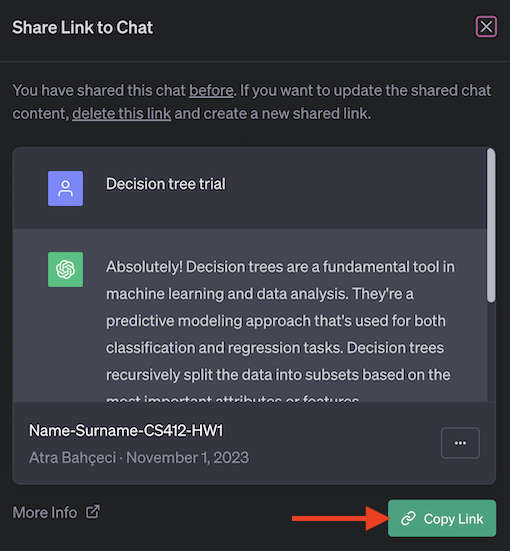

**Link to Chat:** paste link here

https://chat.openai.com/share/76a73730-6432-4f30-bb59-7a609bc9ba43